# Intro to data structures

We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, and axis labeling / alignment apply across all of the objects. To get started, import NumPy and load pandas into your namespace:

In [4]:
import numpy as np
import pandas as pd

Here is a basic tenet to keep in mind: **data alignment is intrinsic**. The link between labels and data will not be broken unless done so explicitly by you.

We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.

## Series

[`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a Series is to call:

In [5]:
s = pd.Series(data, index=index)

NameError: name 'data' is not defined

Here, `data` can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)

The passed **index** is a list of axis labels. Thus, this separates into a few cases depending on what **data is**:

**From ndarray**

If `data` is an ndarray, **index** must be the same length as **data**. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [6]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

s

a   -0.565659
b    0.854632
c   -0.226719
d   -0.074424
e   -0.524650
dtype: float64

In [7]:
pd.Series(np.random.randn(5))

0    0.257911
1   -1.179885
2    0.888577
3    1.364968
4   -0.521503
dtype: float64

*Note*

pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time. The reason for being lazy is nearly all performance-based (there are many instances in computations, like parts of GroupBy, where the index is not used).

**From dict**

Series can be instantiated from dicts:

In [8]:
d = {"b": 1, "a": 0, "c": 2}

pd.Series(d)

b    1
a    0
c    2
dtype: int64

Note

When the data is a dict, and an index is not passed, the Series index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and pandas version >= 0.23.

If you’re using Python < 3.6 or pandas < 0.23, and an index is not passed, the Series index will be the lexically ordered list of dict keys.

In the example above, if you were on a Python version lower than 3.6 or a pandas version lower than 0.23, the Series would be ordered by the lexical order of the dict keys (i.e. ['a', 'b', 'c'] rather than ['b', 'a', 'c']).

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [9]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [10]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [11]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

Note

NaN (not a number) is the standard missing data marker used in pandas.

From scalar value

If data is a scalar value, an index must be provided. The value will be repeated to match the length of index.

In [12]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### Series is ndarray-like

`Series` acts very similarly to a `ndarray`, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [13]:
s[0]

-0.5656592648730306

In [14]:
s[:3]

a   -0.565659
b    0.854632
c   -0.226719
dtype: float64

In [15]:
s[s > s.median()]

b    0.854632
d   -0.074424
dtype: float64

In [16]:
s[[4, 3, 1]]

e   -0.524650
d   -0.074424
b    0.854632
dtype: float64

In [17]:
np.exp(s)

a    0.567986
b    2.350509
c    0.797145
d    0.928278
e    0.591762
dtype: float64

Note

We will address array-based indexing like `s[[4, 3, 1]]` in [section](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing).

Like a NumPy array, a pandas Series has a [`dtype`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dtype.html#pandas.Series.dtype).

In [18]:
s.dtype

dtype('float64')

This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the dtype would be an [`ExtensionDtype`](https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionDtype.html#pandas.api.extensions.ExtensionDtype). Some examples within pandas are [Categorical data](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and [Nullable integer data type](https://pandas.pydata.org/docs/user_guide/integer_na.html#integer-na). See [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) for more.

If you need the actual array backing a `Series`, use [`Series.array`](https://pandas.pydata.org/docs/reference/api/pandas.Series.array.html#pandas.Series.array).

In [19]:
s.array

<PandasArray>
[ -0.5656592648730306,   0.8546320644551999, -0.22671868641425458,
 -0.07442425063908048,   -0.524650431644964]
Length: 5, dtype: float64

Accessing the array can be useful when you need to do some operation without the index (to disable [automatic alignment](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro-alignment), for example).

[`Series.array`](https://pandas.pydata.org/docs/reference/api/pandas.Series.array.html#pandas.Series.array) will always be an [`ExtensionArray`](https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray). Briefly, an ExtensionArray is a thin wrapper around one or more *concrete* arrays like a [`numpy.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray). pandas knows how to take an `ExtensionArray` and store it in a `Series` or a column of a `DataFrame`. See [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) for more.

While Series is ndarray-like, if you need an *actual* ndarray, then use [`Series.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy).

In [20]:
s.to_numpy()

array([-0.56565926,  0.85463206, -0.22671869, -0.07442425, -0.52465043])

Even if the Series is backed by a ExtensionArray, Series.to_numpy() will return a NumPy ndarray.

### Series is dict-like

A Series is like a fixed-size dict in that you can get and set values by index label:

In [21]:
s["a"]

-0.5656592648730306

In [22]:
s["e"] = 12.0

In [23]:
s

a    -0.565659
b     0.854632
c    -0.226719
d    -0.074424
e    12.000000
dtype: float64

In [24]:
"e" in s

True

In [25]:
"f" in s

False

If a label is not contained, an exception is raised:

In [26]:
s["f"]

KeyError: 'f'

Using the get method, a missing label will return None or specified default:

In [27]:
s.get("f")

In [28]:
s.get("f", np.nan)

nan

See also the [section on attribute access](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-attribute-access).

### Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

In [29]:
s + s

a    -1.131319
b     1.709264
c    -0.453437
d    -0.148849
e    24.000000
dtype: float64

In [30]:
s * 2

a    -1.131319
b     1.709264
c    -0.453437
d    -0.148849
e    24.000000
dtype: float64

In [31]:
np.exp(s)

a         0.567986
b         2.350509
c         0.797145
d         0.928278
e    162754.791419
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

s[1:] + s[:-1]

The result of an operation between unaligned Series will have the **union** of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

**Note**

In general, we chose to make the default result of operations between differently indexed objects yield the **union** of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the **dropna** function.

----

### Name attribute

Series can also have a `name` attribute:

In [32]:
s = pd.Series(np.random.randn(5), name="something")

In [33]:
s

0    0.117399
1   -0.490828
2   -1.347699
3    0.337615
4   -0.057241
Name: something, dtype: float64

In [34]:
s.name

'something'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

You can rename a Series with the pandas.Series.rename() method.

In [35]:
s2 = s.rename("different")

In [36]:
s2.name

'different'

Note that s and s2 refer to different objects.

## DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- [Structured or record](https://numpy.org/doc/stable/user/basics.rec.html) ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

**Note**

When the data is a dict, and `columns` is not specified, the `DataFrame` columns will be ordered by the dict’s insertion order, if you are using Python version >= 3.6 and pandas >= 0.23.

If you are using Python < 3.6 or pandas < 0.23, and `columns` is not specified, the `DataFrame` columns will be the lexically ordered list of dict keys.

----

### From dict of Series or dicts

The resulting **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [37]:
d = {
   ....:     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
   ....:     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
   ....: }

In [38]:
df = pd.DataFrame(d)

In [39]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [40]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [41]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

**Note**

When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

----

In [42]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [43]:
df.columns

Index(['one', 'two'], dtype='object')

### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [44]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [45]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [46]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### From structured or record array

This case is handled identically to a dict of arrays.

In [47]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [48]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [49]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [50]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [51]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


**Note**

DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

----



### From a list of dicts

In [52]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [53]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [54]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [55]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [56]:
pd.DataFrame(
   ....:     {
   ....:         ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
   ....:         ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
   ....:         ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
   ....:         ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
   ....:         ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
   ....:     }
   ....: )

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).



### From a list of namedtuples

The field names of the first `namedtuple` in the list determine the columns of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the `DataFrame`. If any of those tuples is shorter than the first `namedtuple` then the later columns in the corresponding row are marked as missing values. If any are longer than the first `namedtuple`, a `ValueError` is raised.

In [57]:
from collections import namedtuple

In [58]:
Point = namedtuple("Point", "x y")

In [59]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [60]:
Point3D = namedtuple("Point3D", "x y z")

In [61]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


### From a list of dataclasses

*New in version 1.1.0.*

Data Classes as introduced in [PEP557](https://www.python.org/dev/peps/pep-0557), can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a TypeError.

In [62]:
from dataclasses import make_dataclass

In [63]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [64]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,0
0,"Point(x=0, y=0)"
1,"Point(x=0, y=3)"
2,"Point(x=2, y=3)"


**Missing data**

Much more will be said on this topic in the [Missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) section. To construct a DataFrame with missing data, we use `np.nan` to represent missing values. Alternatively, you may pass a `numpy.MaskedArray` as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

### Alternate constructors

**DataFrame.from_dict**

`DataFrame.from_dict` takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the `DataFrame` constructor except for the `orient` parameter which is `'columns'` by default, but which can be set to `'index'` in order to use the dict keys as row labels.

In [65]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass orient='index', the keys will be the row labels. In this case, you can also pass the desired column names:

In [66]:
pd.DataFrame.from_dict(
   ....:     dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
   ....:     orient="index",
   ....:     columns=["one", "two", "three"],
   ....: )

,one,two,three
A,1,2,3
B,4,5,6


**DataFrame.from_records**

`DataFrame.from_records` takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal `DataFrame` constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example:

In [67]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [68]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


### Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [69]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [70]:
df["three"] = df["one"] * df["two"]

In [71]:
df["flag"] = df["one"] > 2

In [72]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [73]:
del df["two"]

In [74]:
three = df.pop("three")

In [75]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [76]:
df["foo"] = "bar"

In [77]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [78]:
df["one_trunc"] = df["one"][:2]

In [79]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

In [80]:
df.insert(1, "bar", df["one"])

In [81]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### Assigning new columns in method chains

Inspired by [dplyr’s](https://dplyr.tidyverse.org/reference/mutate.html) `mutate` verb, DataFrame has an [`assign()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign) method that allows you to easily create new columns that are potentially derived from existing columns.

**Iris Data Set** can download from [here](https://archive.ics.uci.edu/ml/datasets/Iris)

In [86]:
iris = pd.read_csv("data/iris.data")

In [87]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [89]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


`assign` **always** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

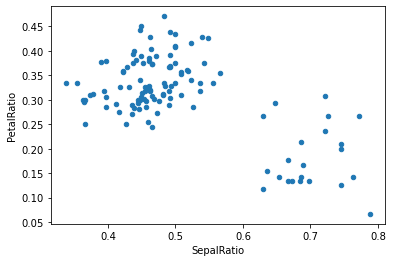

In [90]:
(
   ....:     iris.query("SepalLength > 5")
   ....:     .assign(
   ....:         SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
   ....:         PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
   ....:     )
   ....:     .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
   ....: )

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the *filtered* DataFrame available.

The function signature for `assign` is simply `**kwargs`. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the `DataFrame`. A *copy* of the original DataFrame is returned, with the new values inserted.

Starting with Python 3.6 the order of `**kwargs` is preserved. This allows for *dependent* assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same [`assign()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign).

In [91]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [92]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, `x['C']` will refer to the newly created column, that’s equal to `dfa['A'] + dfa['B']`.

### Indexing / selection

The basics of indexing are as follows:

| Operation                      | Syntax          | Result    |
| :----------------------------- | :-------------- | :-------- |
| Select column                  | `df[col]`       | Series    |
| Select row by label            | `df.loc[label]` | Series    |
| Select row by integer location | `df.iloc[loc]`  | Series    |
| Slice rows                     | `df[5:10]`      | DataFrame |
| Select rows by boolean vector  | `df[bool_vec]`  | DataFrame |

Row selection, for example, returns a Series whose index is the columns of the DataFrame:

In [93]:
df.loc["b"]

one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [94]:
df.iloc[2]

one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

For a more exhaustive treatment of sophisticated label-based indexing and slicing, see the [section on indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing). We will address the fundamentals of reindexing / conforming to new sets of labels in the [section on reindexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-reindexing).



### Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

In [95]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [96]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [97]:
df + df2

,A,B,C,D
0,0.808829,-0.099968,-0.974481,NaN
1,0.067938,1.999494,-0.551577,NaN
2,-3.057653,1.078809,-2.998995,NaN
3,-1.964617,-2.817856,2.893572,NaN
4,0.177130,-0.703473,2.305180,NaN
5,1.188991,1.748168,0.666683,NaN
6,0.007839,2.550916,3.387675,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series **index** on the DataFrame **columns**, thus [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) row-wise. For example:

In [98]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.304285,0.105638,0.754146,-0.736052
2,-1.003724,0.368084,-0.193476,1.241965
3,0.193938,-1.300662,2.175411,0.187489
4,-0.180312,-0.631822,2.642637,-1.806069
5,0.038755,2.121881,0.589319,1.232402
6,-0.016729,1.070694,2.464317,0.696166
7,-0.602948,0.440883,0.331640,0.061963
8,1.392556,1.226315,-0.353741,2.518073
9,0.774123,1.182758,0.050510,-1.955979


For explicit control over the matching and broadcasting behavior, see the section on [flexible binary operations](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-binop).

Operations with scalars are just as you would expect:

In [99]:
df * 5 + 2

,A,B,C,D
0,0.279664,1.603823,-1.509764,1.619444
1,-1.241760,2.132015,2.260964,-2.060818
2,-4.738955,3.444244,-2.477142,7.829269
3,1.249356,-4.899488,9.367290,2.556891
4,-0.621893,-1.555288,11.703422,-7.410902
5,0.473440,12.213226,1.436832,7.781453
6,0.196022,6.957292,10.811821,5.100273
7,-2.735076,3.808236,0.148434,1.929258
8,7.242444,7.735399,-3.278468,14.209810
9,4.150277,7.517614,-1.257215,-8.160452


In [100]:
1 / df

,A,B,C,D
0,-2.906410,-12.620622,-1.424597,-13.138668
1,-1.542372,37.874428,19.159753,-1.231279
2,-0.741955,3.462019,-1.116784,0.857740
3,-6.660946,-0.724691,0.678676,8.978425
4,-1.907019,-1.406356,0.515282,-0.531299
5,-3.275337,0.489561,-8.878353,0.864835
6,-2.771652,1.008615,0.567420,1.612761
7,-1.055949,2.765126,-2.700417,-70.679458
8,0.953754,0.871779,-0.947245,0.409507
9,2.325282,0.906189,-1.535054,-0.492104


In [101]:
df ** 4

,A,B,C,D
0,0.014014,3.941640e-05,0.242790,3.355789e-05
1,0.176703,4.859769e-07,0.000007,4.350850e-01
2,3.299819,6.961173e-03,0.642870,1.847466e+00
3,0.000508,3.625663e+00,4.713582,1.538861e-04
4,0.075610,2.556344e-01,14.184686,1.255004e+01
5,0.008689,1.740892e+01,0.000161,1.787590e+00
6,0.016945,9.662687e-01,9.646784,1.478155e-01
7,0.804318,1.710567e-02,0.018805,4.007072e-08
8,1.208524,1.731309e+00,1.242085,3.555950e+01
9,0.034206,1.482946e+00,0.180097,1.705187e+01


Boolean operators work as well:

In [102]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

In [103]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [104]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [105]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [106]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [107]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


### Transposing

To transpose, access the `T` attribute (also the `transpose` function), similar to an ndarray:

In [108]:
# only show the first 5 rows
df[:5].T

,0,1,2,3,4
A,-0.344067,-0.648352,-1.347791,-0.150129,-0.524379
B,-0.079235,0.026403,0.288849,-1.379898,-0.711058
C,-0.701953,0.052193,-0.895428,1.473458,1.940684
D,-0.076111,-0.812164,1.165854,0.111378,-1.882180


### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [109]:
np.exp(df)

,A,B,C,D
0,0.708881,0.923822,0.495617,0.926713
1,0.522907,1.026755,1.053579,0.443897
2,0.259814,1.334890,0.408433,3.208662
3,0.860597,0.251604,4.364301,1.117817
4,0.591923,0.491124,6.963516,0.152258
5,0.736893,7.710980,0.893478,3.178122
6,0.697121,2.695162,5.826195,1.859030
7,0.387897,1.435692,0.690518,0.985951
8,2.853336,3.148984,0.347951,11.495574
9,1.537343,3.014768,0.521293,0.131061


In [110]:
np.asarray(df)

array([[-0.34406714, -0.07923539, -0.70195277, -0.07611122],
       [-0.64835204,  0.02640304,  0.05219274, -0.8121636 ],
       [-1.34779091,  0.28884882, -0.89542842,  1.16585389],
       [-0.15012883, -1.37989759,  1.47345805,  0.1113781 ],
       [-0.52437868, -0.71105767,  1.94068446, -1.88218037],
       [-0.30531208,  2.04264525, -0.11263351,  1.15629054],
       [-0.36079568,  0.99145836,  1.76236411,  0.62005464],
       [-0.94701513,  0.36164714, -0.3703132 , -0.01414838],
       [ 1.04848889,  1.14707985, -1.05569355,  2.44196206],
       [ 0.43005537,  1.1035228 , -0.65144295, -2.03209039]])

DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

[`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) implements `__array_ufunc__`, which allows it to work with NumPy’s [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html).

The ufunc is applied to the underlying array in a Series.

In [111]:
ser = pd.Series([1, 2, 3, 4])

In [112]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

*Changed in version 0.25.0:* When multiple `Series` are passed to a ufunc, they are aligned before performing the operation.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using `numpy.remainder()` on two [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) with differently ordered labels will align before the operation.

In [113]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])

In [114]:
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

In [115]:
ser1

a    1
b    2
c    3
dtype: int64

In [116]:
ser2

b    1
a    3
c    5
dtype: int64

In [117]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [118]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])

In [119]:
ser3

b    2
c    4
d    6
dtype: int64

In [120]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a Series and Index, the Series implementation takes precedence and a Series is returned.

In [121]:
ser = pd.Series([1, 2, 3])

In [122]:
idx = pd.Index([4, 5, 6])

In [123]:
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

NumPy ufuncs are safe to apply to [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) backed by non-ndarray arrays, for example [`arrays.SparseArray`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.arrays.SparseArray.html#pandas.arrays.SparseArray) (see [Sparse calculation](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#sparse-calculation)). If possible, the ufunc is applied without converting the underlying data to an ndarray.

### Console display

Very large DataFrames will be truncated to display them in the console. You can also get a summary using [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info). (Here I am reading a CSV version of the **baseball** dataset from the **plyr** R package):

In [124]:
baseball = pd.read_csv("data/baseball.csv")

In [125]:
print(baseball)

       id     player  year  stint team  lg    g   ab   r    h  ...   rbi   sb  \
0   88641  womacto01  2006      2  CHN  NL   19   50   6   14  ...   2.0  1.0   
1   88643  schilcu01  2006      1  BOS  AL   31    2   0    1  ...   0.0  0.0   
2   88645  myersmi01  2006      1  NYA  AL   62    0   0    0  ...   0.0  0.0   
3   88649  helliri01  2006      1  MIL  NL   20    3   0    0  ...   0.0  0.0   
4   88650  johnsra05  2006      1  NYA  AL   33    6   0    1  ...   0.0  0.0   
..    ...        ...   ...    ...  ...  ..  ...  ...  ..  ...  ...   ...  ...   
95  89525  benitar01  2007      2  FLO  NL   34    0   0    0  ...   0.0  0.0   
96  89526  benitar01  2007      1  SFN  NL   19    0   0    0  ...   0.0  0.0   
97  89530  ausmubr01  2007      1  HOU  NL  117  349  38   82  ...  25.0  6.0   
98  89533   aloumo01  2007      1  NYN  NL   87  328  51  112  ...  49.0  3.0   
99  89534  alomasa02  2007      1  NYN  NL    8   22   1    3  ...   0.0  0.0   

     cs  bb    so  ibb  hbp

In [126]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

However, using `to_string` will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

In [127]:
print(baseball.iloc[-20:, :12].to_string())

       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b
80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0
92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40   

Wide DataFrames will be printed across multiple rows by default:

In [128]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.279580,0.485758,1.120559,1.460349,-1.070041,-0.190526,-0.022718,-1.564327,1.423340,-1.065357,0.960870,0.134332
1,0.878077,1.148692,1.793952,0.565590,0.824827,-0.396618,0.126614,-1.428553,1.836124,-0.622308,0.950092,0.008438
2,-1.035767,0.411891,1.983165,1.523077,-0.123259,0.603059,-0.366312,-0.415486,0.548956,2.972171,-0.021929,-0.148661


You can change how much to print on a single row by setting the display.width option:

In [129]:
pd.set_option("display.width", 40)  # default is 80

In [130]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.021906,-2.701603,-1.366017,-0.513631,1.101352,-0.263492,-0.322891,-0.137508,-0.933317,-1.880641,-1.033722,-2.386749
1,-2.284872,-0.134304,0.934019,-0.301076,2.185150,0.484285,0.744276,-0.292086,0.337509,-0.649674,0.663591,1.573000
2,-1.084047,0.083813,1.473911,-2.144730,1.994475,1.241651,-0.606380,0.412839,0.544324,0.771374,1.336507,0.412708


You can adjust the max width of the individual columns by setting `display.max_colwidth`

In [131]:
datafile = {
   .....:     "filename": ["filename_01", "filename_02"],
   .....:     "path": [
   .....:         "media/user_name/storage/folder_01/filename_01",
   .....:         "media/user_name/storage/folder_02/filename_02",
   .....:     ],
   .....: }

In [132]:
pd.set_option("display.max_colwidth", 30)

In [133]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [134]:
pd.set_option("display.max_colwidth", 100)

In [135]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


You can also disable this feature via the `expand_frame_repr` option. This will print the table in one block.

### DataFrame column attribute access and IPython completion

If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [136]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})

In [137]:
df

,foo1,foo2
0,-0.567911,1.506598
1,-0.667760,0.734755
2,2.502273,0.182483
3,0.057411,0.464521
4,0.603139,-0.097720


In [138]:
df.foo1

0   -0.567911
1   -0.667760
2    2.502273
3    0.057411
4    0.603139
Name: foo1, dtype: float64

The columns are also connected to the IPython completion mechanism so they can be tab-completed:

In [145]:
df.columns  # noqa: E225, E999

Index(['foo1', 'foo2'], dtype='object')